<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/Quadratic%20Drag%20for%20Vertical%20Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- - - -
# Quadratic Drag for Vertical Motion

- - - -

Martin Veillette @ Berea College

- - - -

## Solving a first order differential equation numerically

Consider a baseball thrown verticaly with a speed of 30 m/s (about 70 mi/h).
Find the position of the ball as a function of time and compare its trajectory to the frictionless case

Using a coordinate system where upward is defined as positive y, we have to solve the differential equation
$$m \frac{d v_y}{dt} = - m g - c  |v_y| v_y$$


The terminal speed is $v_{ter} = \sqrt{\frac{mg}{c}}$. The characteristic time scale for this problem is $\tau\equiv \frac{v_{ter}}{g}$.


Rewriting the equation in term of $\tilde{t}=t/\tau$ and $\tilde{v}=v_y/v_{ter}$, we arrive to


$$\frac{d \tilde{v}}{d \tilde{t}} = - 1 -  |\tilde{v}| \tilde{v}$$


In [2]:
# import numpy library and matplotlib

import numpy as np

# to plot our result
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (14,10)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14
#get_ipython().magic('matplotlib inline') # inline plotting

## Numerical Solution using Euler-Cromer Method

The code below uses the Euler-Cromer method to numerically solve the differential equation. This method is a simple integration technique that is more stable than the basic Euler method for many physical systems. It updates the velocity first based on the acceleration at the current time step and then uses this updated velocity to calculate the new position.

The equations used are:

$v_{i+1} = v_i + a_i \Delta t$

$y_{i+1} = y_i + v_{i} \Delta t+ \frac{1}{2} a_i (\Delta t)^2$

where:
- $v_i$ and $y_i$ are the velocity and position at the current time step $i$.
- $a_i$ is the acceleration at the current time step $i$.
- $\Delta t$ is the time step size.
- $v_{i+1}$ and $y_{i+1}$ are the velocity and position at the next time step $i+1$.




In [33]:
# SIMULATION PARAMETERS
tmax = 5.00  # Final simulation time in units of tau (characteristic time scale)
numberOfSteps = 1000  # Number of discrete time steps for numerical integration
dt = tmax/numberOfSteps  # Time step size (delta t)
timeRange = np.linspace(0, tmax, numberOfSteps)  # Create array of time values

# INITIAL CONDITIONS
v = 0.5  # Initial velocity in units of terminal speed (negative = downward)
y = 0      # Initial vertical position (starting point)

# DATA STORAGE ARRAYS
vs = []  # Array to store velocity values at each time step
ys = []  # Array to store position values at each time step

# NUMERICAL INTEGRATION LOOP (Euler's method with position correction)
for t in timeRange:
    # Calculate acceleration using drag force model
    # a = -g/v_terminal - (drag force)/mass
    # The term -1 represents gravity, -abs(v)*v represents quadratic air resistance
    a = -1 - abs(v) * v  # Acceleration in units of g

    # Update position using kinematic equation (includes acceleration correction)
    # Uses: y_new = y_old + v*dt + (1/2)*a*dt^2
    y = y + v * dt + 1/2 * a * dt**2  # New vertical position

    # Update velocity using Euler's method
    # Uses: v_new = v_old + a*dt
    v = v + a * dt  # New vertical velocity

    # Store current values for plotting/analysis
    vs.append(v)  # Add current velocity to results array
    ys.append(y)  # Add current position to results array

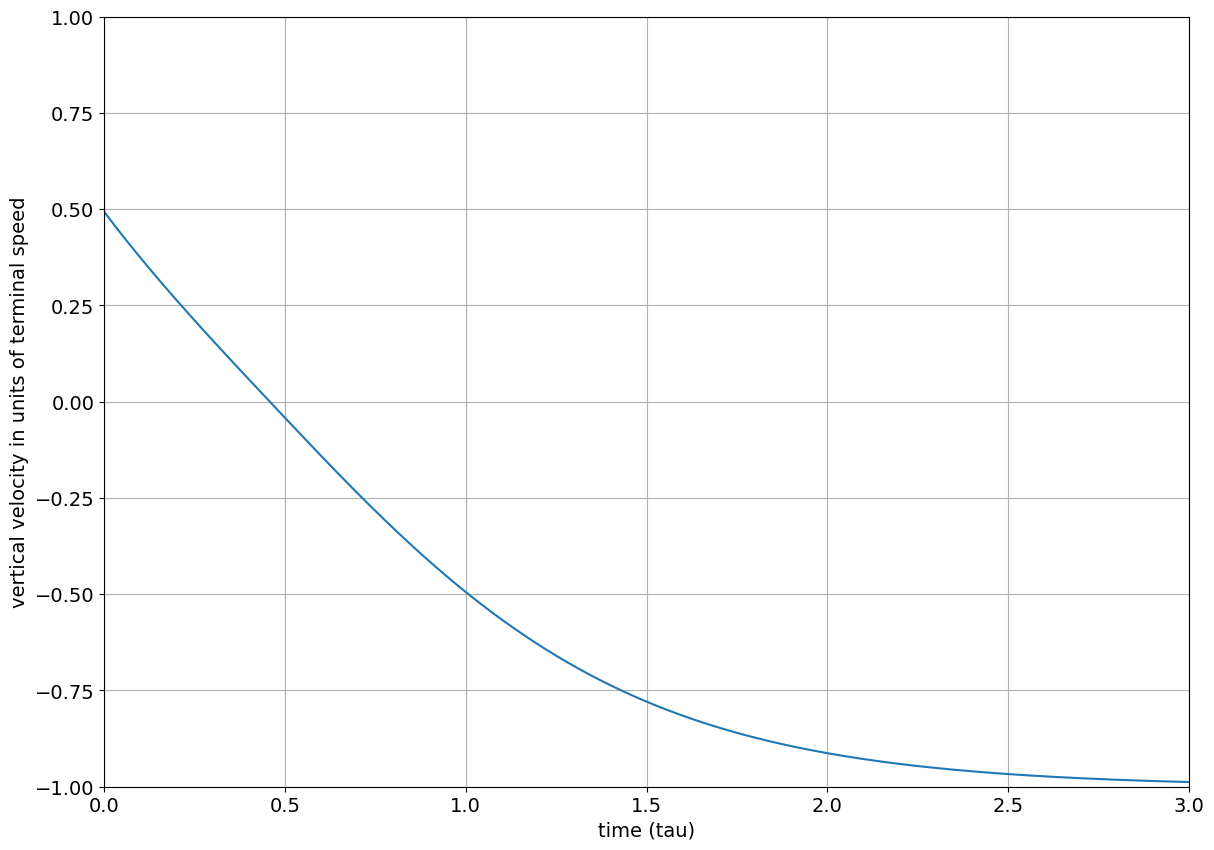

In [34]:
# plot the solution
plt.plot(timeRange,vs)
plt.ylabel('vertical velocity in units of terminal speed')
plt.xlabel('time (tau)')
plt.grid()
plt.axis([0,3,-1,1])
plt.savefig('velocity.png')
plt.show()

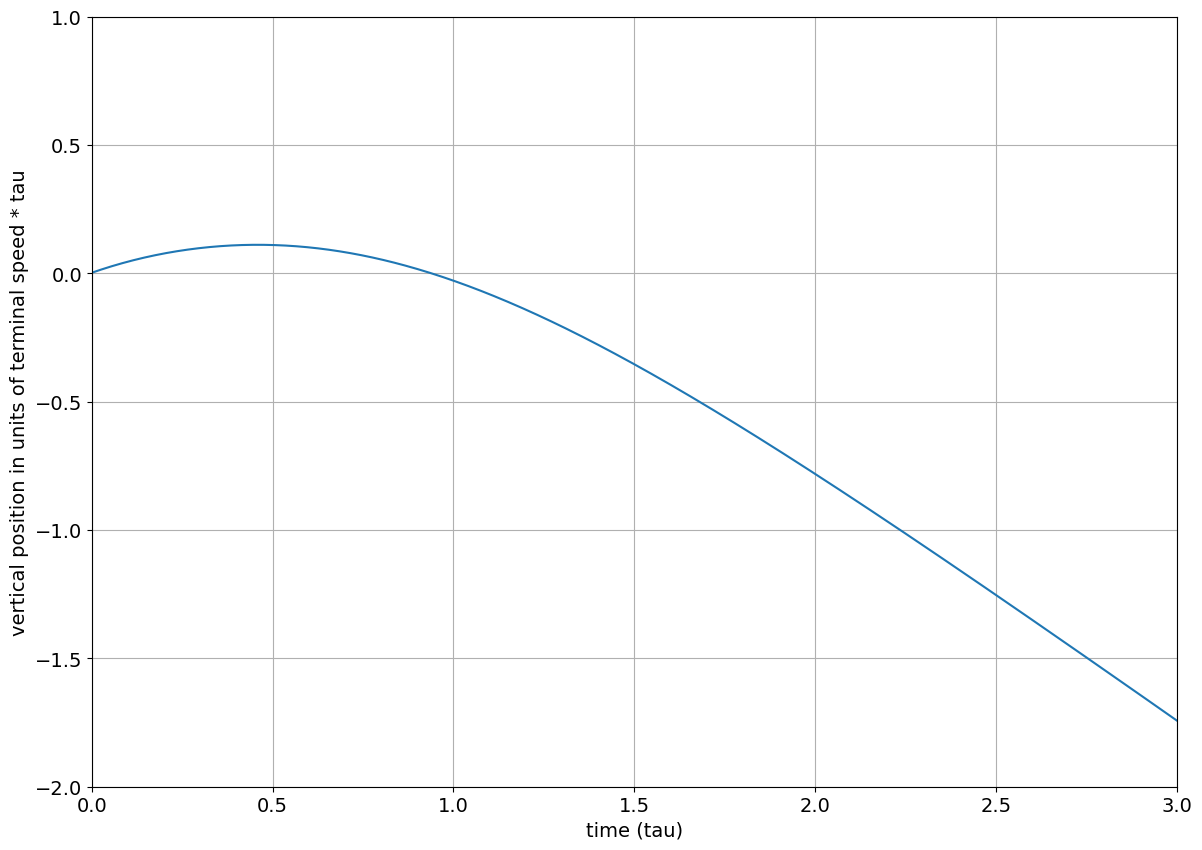

In [35]:
# plot the solution
plt.plot(timeRange,ys)
plt.ylabel('vertical position in units of terminal speed * tau')
plt.xlabel('time (tau)')
plt.grid()
plt.axis([0,3,-2,1])
plt.savefig('position.png')
plt.show()

Le'ts make some pretty graph

## How long does it take for the ball to reach the maximum height

In [37]:
# Find the actual maximum value in the position array
# (accounts for numerical precision)
max_height_index = np.argmax(ys)
time_to_max_height = timeRange[max_height_index]
max_height = ys[max_height_index]
print(f"\nMethod 2 (max position): Time to max height = {time_to_max_height:.3f} τ")
print(f"Maximum height = {max_height:.3f} units")



Method 2 (max position): Time to max height = 0.460 τ
Maximum height = 0.111 units


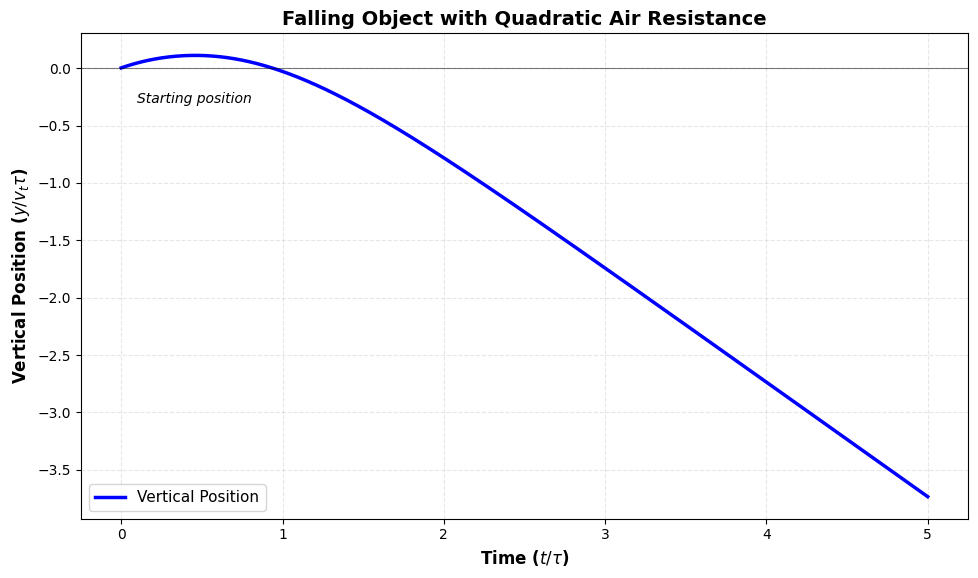

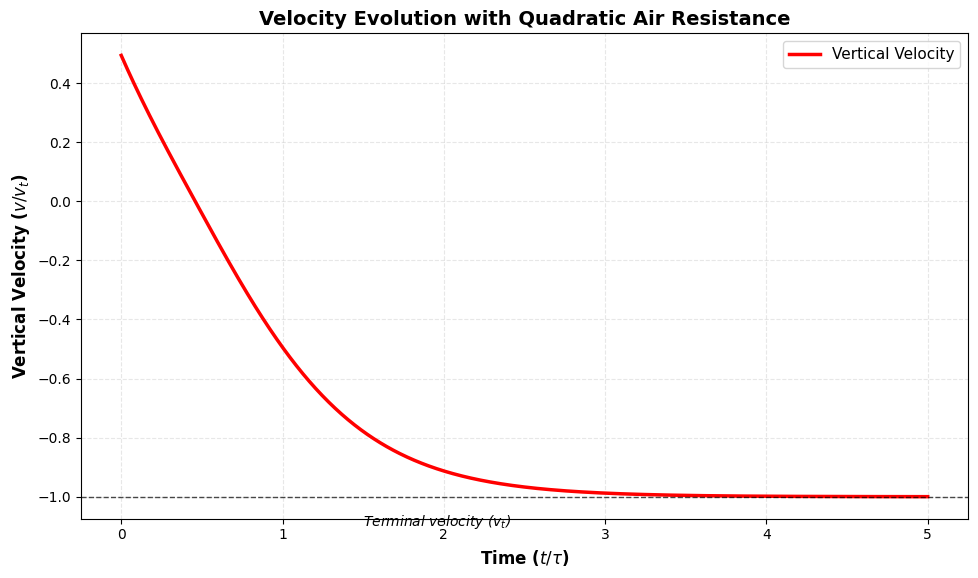

In [39]:
# Create high-quality plot of the solution
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Plot with improved styling
plt.plot(timeRange, ys, 'b-', linewidth=2.5, label='Vertical Position')

# Enhanced labels with proper physics notation
plt.ylabel('Vertical Position ($y/v_t\\tau$)', fontsize=12, fontweight='bold')
plt.xlabel('Time ($t/\\tau$)', fontsize=12, fontweight='bold')
plt.title('Falling Object with Quadratic Air Resistance', fontsize=14, fontweight='bold')

# Improved grid and styling
plt.grid(True, alpha=0.3, linestyle='--')

# Add legend and improve tick formatting
plt.legend(fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=10)

# Add physics context with annotations
plt.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=0.8)  # Reference line at y=0
plt.text(0.1, -0.3, 'Starting position', fontsize=10, style='italic')

# Improve layout and save with higher DPI
plt.tight_layout()
plt.savefig('position.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Create a second plot showing velocity vs time for comparison
plt.figure(figsize=(10, 6))
plt.plot(timeRange, vs, 'r-', linewidth=2.5, label='Vertical Velocity')
plt.ylabel('Vertical Velocity ($v/v_t$)', fontsize=12, fontweight='bold')
plt.xlabel('Time ($t/\\tau$)', fontsize=12, fontweight='bold')
plt.title('Velocity Evolution with Quadratic Air Resistance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.axhline(y=-1, color='k', linestyle='--', alpha=0.7, linewidth=1)  # Terminal velocity line
plt.text(1.5, -1.1, 'Terminal velocity ($v_t$)', fontsize=10, style='italic')
plt.legend(fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.savefig('velocity.png', dpi=300, bbox_inches='tight')
plt.show()